## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests
import json

## NeoWs (Near Earth Object Web Service)

In [2]:
api_key = "Bu6eTGuiYXUcf8mJ2NQDKK202oERv4Y09Q0JagKe"
num_paginas = 10
raw_data = []
for page in range(num_paginas):
    resp = requests.get(f'https://api.nasa.gov/neo/rest/v1/neo/browse?page={page}&api_key={api_key}')
    raw_data.append(json.loads(resp.text))

In [3]:
len(raw_data)

10

### Data Frame simplificado

In [4]:
# Lista das colunas de interesse para o data frame simplificado
int_cols = ['id',
           'name',
           'absolute_magnitude_h',
           'is_potentially_hazardous_asteroid']

In [5]:
# Data frame simplificado com as informções do primeiro level dos dicionários
simp_df = pd.json_normalize(data=raw_data, record_path=['near_earth_objects']).loc[:,int_cols]
simp_df.describe(include='all')

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid
count,200,200,200.000000,200
unique,200,200,NaN,2
top,2006053,18109 (2000 NG11),NaN,False
freq,1,1,NaN,152
mean,NaN,NaN,16.346750,NaN
std,NaN,NaN,1.639044,NaN
min,NaN,NaN,9.250000,NaN
25%,NaN,NaN,15.247500,NaN
50%,NaN,NaN,16.365000,NaN
75%,NaN,NaN,17.322500,NaN


### Data frame estendido

In [6]:
# Lista das colunas de interesse para o data frame estendido
int_cols_ext = ['id',
                'name',
               'absolute_magnitude_h',
               'is_potentially_hazardous_asteroid',
               'orbital_data.first_observation_date',
               'orbital_data.minimum_orbit_intersection']

In [7]:
# appended_pages = []
# for page in range(len(raw_data)):
#     page_df = pd.json_normalize(raw_data[page]['near_earth_objects'], record_path=['close_approach_data'], meta=['id', 'absolute_magnitude_h', 'is_potentially_hazardous_asteroid'])#.loc[:,int_cols_ext]
#     appended_pages.append(page_df)

In [8]:
# Páginas agrupadas em forma de lista com as informações do segundo level dos dicionários 
appended_pages = []
for page in range(len(raw_data)):
    page_df = pd.json_normalize(raw_data[page]['near_earth_objects'], meta=['id', 'absolute_magnitude_h', 'is_potentially_hazardous_asteroid']).loc[:,int_cols_ext]
    appended_pages.append(page_df)

In [9]:
# Cria o data frame estendido
ext_df = pd.concat(appended_pages, ignore_index=True)
ext_df.describe(include='all')

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid,orbital_data.first_observation_date,orbital_data.minimum_orbit_intersection
count,200,200,200.000000,200,200,200
unique,200,200,NaN,2,192,200
top,2006053,18109 (2000 NG11),NaN,False,1960-10-22,.274532
freq,1,1,NaN,152,2,1
mean,NaN,NaN,16.346750,NaN,NaN,NaN
std,NaN,NaN,1.639044,NaN,NaN,NaN
min,NaN,NaN,9.250000,NaN,NaN,NaN
25%,NaN,NaN,15.247500,NaN,NaN,NaN
50%,NaN,NaN,16.365000,NaN,NaN,NaN
75%,NaN,NaN,17.322500,NaN,NaN,NaN


## Número de objetos perigosos à Terra

In [10]:
# Data frame somente com os objetos perigosos à Terra
dang_obj = simp_df.loc[simp_df['is_potentially_hazardous_asteroid']==True]
dang_obj.head()

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid
5,2001566,1566 Icarus (1949 MA),16.34,True
7,2001620,1620 Geographos (1951 RA),15.30,True
10,2001862,1862 Apollo (1932 HA),16.11,True
20,2001981,1981 Midas (1973 EA),15.22,True
26,2002101,2101 Adonis (1936 CA),18.64,True


In [11]:
num_dang_obj = len(dang_obj)
porc_dang_obj = round(100*len(dang_obj)/len(simp_df), 2)
print(f'Quantidade de objetos pergisos à Terra: {num_dang_obj}')
print(f'Porcentagem de objetos perigoso: {porc_dang_obj}%')

Quantidade de objetos pergisos à Terra: 48
Porcentagem de objetos perigoso: 24.0%


## Média e desvio padrão da distância dos objetos perigosos

In [12]:
dang_obj_id = dang_obj['id'].values
dang_obj_id

array(['2001566', '2001620', '2001862', '2001981', '2002101', '2002102',
       '2002135', '2002201', '2002340', '2003122', '2003200', '2003361',
       '2003362', '2003671', '2003757', '2004015', '2004034', '2004179',
       '2004183', '2004450', '2004486', '2004581', '2004660', '2004769',
       '2004953', '2005011', '2005189', '2005604', '2005693', '2006037',
       '2006239', '2006489', '2006491', '2007335', '2007341', '2007482',
       '2007753', '2007822', '2008014', '2008566', '2009856', '2010115',
       '2011500', '2012538', '2012923', '2013651', '2014827', '2016960'],
      dtype=object)

In [13]:
# Converte a coluna 'orbital_data.minimum_orbit_intersection' em float
ext_df['orbital_data.minimum_orbit_intersection'] = ext_df['orbital_data.minimum_orbit_intersection'].astype(float)

In [14]:
#mean_all = ext_df.groupby('id', as_index=False).mean()#.drop('is_potentially_hazardous_asteroid', axis=1)

In [15]:
#mean_all.head()

In [16]:
# dang_obj_mean = mean_all.loc[mean_all['id'].isin(dang_obj_id)]
# dang_obj_mean = dang_obj_mean.rename(columns={'orbital_data.minimum_orbit_intersection': 'mean'})
# dang_obj_mean

In [17]:
#std_all = ext_df.groupby('id', as_index=False).std()#.drop('absolute_magnitude_h', axis=1)

In [18]:
# dang_obj_std = std_all.loc[std_all['id'].isin(dang_obj_id)]
# dang_obj_std = dang_obj_std.rename(columns={'miss_distance.lunar': 'std'})
# dang_obj_std

In [19]:
# dang_obj_sta = pd.concat([dang_obj, dang_obj_mean['mean'], dang_obj_std['std']], axis=1)
# dang_obj_sta

In [20]:
mean_min_distance = ext_df.loc[ext_df['id'].isin(dang_obj_id)]['orbital_data.minimum_orbit_intersection'].mean()
std_min_distance = ext_df.loc[ext_df['id'].isin(dang_obj_id)]['orbital_data.minimum_orbit_intersection'].std()
print(f"Média das distâncias mínimas dos objetos perigosos: {round(mean_min_distance, 4)}")
print(f"Desvio padrão das distânsicas mínimas dos objetos perigosos: {round(std_min_distance, 4)}")

Média das distâncias mínimas dos objetos perigosos: 0.0228
Desvio padrão das distânsicas mínimas dos objetos perigosos: 0.0133


## Aproximação de asteróides perigosos à Terra entre 2000 e 2021

In [21]:
# Converte a coluna 'orbital_data.first_observation_date' em forma de datas
ext_df['orbital_data.first_observation_date'] = pd.to_datetime(ext_df['orbital_data.first_observation_date'])

In [22]:
# Cria o filtro dos objetos pela data desejada
# start_date = '2000-01-01'
# end_date = '2021-12-31'
# mask = (ext_df['orbital_data.first_observation_date'] > start_date) & (ext_df['orbital_data.first_observation_date'] < end_date)

In [23]:
# obj_period = ext_df.loc[mask]
# obj_period.head()

In [24]:
# dang_obj_period = obj_period.loc[obj_period['is_potentially_hazardous_asteroid']==True]
# dang_obj_period['close_approach_date'].hist(bins=22)
# plt.title('Objetos perigosos à Terra no período de 2000 e 20021')
# plt.xlabel('Ano de aproximação')
# plt.ylabel('Contagem')
# plt.show()

**A organização dos dados mudaram, de forma que para conseguir as aparições dos objetos por ano ficou mais complexa.**

## Histograma dos tamanhos dos objetos perigosos

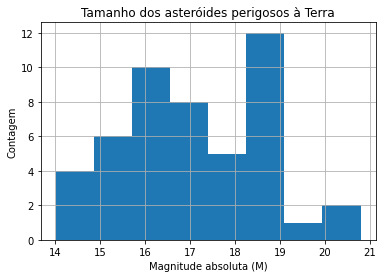

In [25]:
dang_obj['absolute_magnitude_h'].hist(bins=8)
plt.title('Tamanho dos asteróides perigosos à Terra')
plt.xlabel('Magnitude absoluta (M)')
plt.ylabel('Contagem')
plt.show()

## Histograma dos tamanhos dos objetos inofencivos

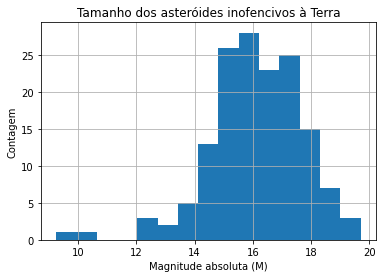

In [26]:
simp_df.loc[-simp_df['id'].isin(dang_obj_id)]['absolute_magnitude_h'].hist(bins=15)
plt.title('Tamanho dos asteróides inofencivos à Terra')
plt.xlabel('Magnitude absoluta (M)')
plt.ylabel('Contagem')
plt.show()

## Algumas informações estatísticas

### Gráfico da dispersão

In [27]:
# x = dang_obj_sta['mean']
# y = dang_obj_sta['absolute_magnitude_h']

# plt.title('Gráfico de dispersão da distância média por M')
# plt.xlabel('Média da mínima distância observada')
# plt.ylabel('Magnitude absoluta (M)')
# plt.plot(x,y, 'o')
# plt.show()

Gráfico de disperção entre a magnitude absoluta (M) e a média da mínima distância observada para cada asteróide

### Correlação e covariância dos dados dos objetos perigosos

In [28]:
ext_dang_obj = ext_df.loc[ext_df['is_potentially_hazardous_asteroid']==True]
ext_dang_obj.head()

,id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid,orbital_data.first_observation_date,orbital_data.minimum_orbit_intersection
5,2001566,1566 Icarus (1949 MA),16.34,True,1949-07-01,0.033700
7,2001620,1620 Geographos (1951 RA),15.30,True,1951-09-14,0.029221
10,2001862,1862 Apollo (1932 HA),16.11,True,1930-12-13,0.026045
20,2001981,1981 Midas (1973 EA),15.22,True,1973-03-06,0.003288
26,2002101,2101 Adonis (1936 CA),18.64,True,1936-02-21,0.011560


In [29]:
ext_dang_obj.corr()

,absolute_magnitude_h,is_potentially_hazardous_asteroid,orbital_data.minimum_orbit_intersection
absolute_magnitude_h,1.000000,NaN,-0.201645
is_potentially_hazardous_asteroid,NaN,NaN,NaN
orbital_data.minimum_orbit_intersection,-0.201645,NaN,1.000000


In [30]:
ext_dang_obj.cov()

,absolute_magnitude_h,is_potentially_hazardous_asteroid,orbital_data.minimum_orbit_intersection
absolute_magnitude_h,2.580902,0.0,-0.004314
is_potentially_hazardous_asteroid,0.000000,0.0,0.000000
orbital_data.minimum_orbit_intersection,-0.004314,0.0,0.000177


### Distribuição dos tamanhos dos objetos perigosos e inofencivos

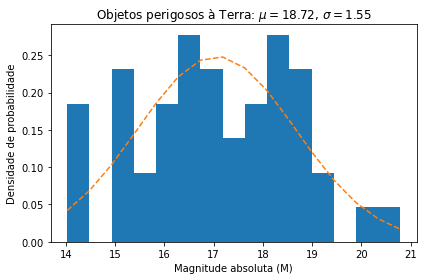

In [31]:
# data parameters
x = dang_obj['absolute_magnitude_h']
mu = x.mean()  # mean of distribution
sigma = x.std()  # standard deviation of distribution

num_bins = 15

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Magnitude absoluta (M)')
ax.set_ylabel('Densidade de probabilidade')
ax.set_title(r'Objetos perigosos à Terra: $\mu=18.72$, $\sigma=1.55$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

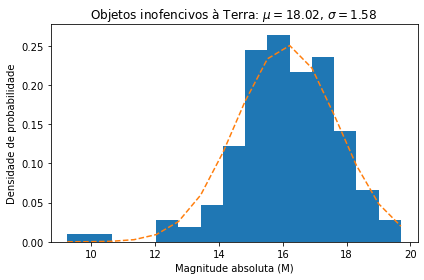

In [32]:
# data parameters
x = simp_df.loc[-simp_df['id'].isin(dang_obj_id)]['absolute_magnitude_h']
mu = x.mean()  # mean of distribution
sigma = x.std()  # standard deviation of distribution

num_bins = 15

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Magnitude absoluta (M)')
ax.set_ylabel('Densidade de probabilidade')
ax.set_title(r'Objetos inofencivos à Terra: $\mu=18.02$, $\sigma=1.58$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## Exploração dos dados

Histograma sobrepondo a magnitude absoluta (M) dos objetos perigosos sobre os inofencivos

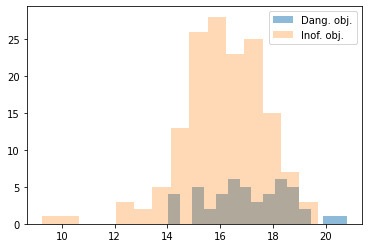

In [44]:
x1 = dang_obj['absolute_magnitude_h']
x2 = simp_df.loc[-simp_df['id'].isin(dang_obj_id)]['absolute_magnitude_h']

bins = 15

plt.hist(x1, bins, alpha=0.5, label='Dang. obj.')
plt.hist(x2, bins, alpha=0.3, label='Inof. obj.')
plt.legend(loc='upper right')
plt.show()

Gráfico de bolhas de três dimensões, data de aproximação x distância mínima x magnitude absoluta.  
As cores distinguem entre perigosos e inofencivos.

In [48]:
ext_inof_obj = ext_df.loc[ext_df['is_potentially_hazardous_asteroid']==False]
ext_inof_obj.describe()

,absolute_magnitude_h,orbital_data.minimum_orbit_intersection
count,152.000000,152.000000
mean,16.121974,0.181331
std,1.589088,0.089278
min,9.250000,0.050776
25%,15.150000,0.107445
50%,16.135000,0.175150
75%,17.167500,0.244668
max,19.700000,0.425066


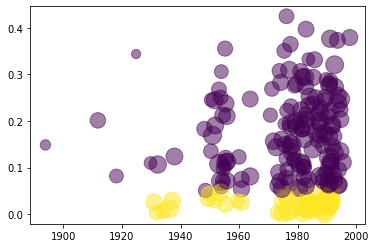

In [101]:
x = ext_df['orbital_data.first_observation_date']
y = ext_df['orbital_data.minimum_orbit_intersection']
sizes = ext_df['absolute_magnitude_h']**2
colors = ext_df['is_potentially_hazardous_asteroid']

plt.scatter(x, y, s=sizes, c=colors, alpha=0.5)

#plt.legend((colors), (colors))
plt.show()

Relação entre a magnitude absoluta (M) e a mínima distância observada

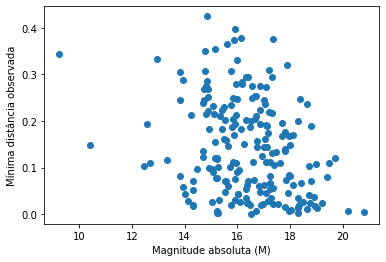

In [97]:
x = ext_df['absolute_magnitude_h']
y = ext_df['orbital_data.minimum_orbit_intersection']

plt.scatter(x, y)

plt.xlabel('Magnitude absoluta (M)')
plt.ylabel('Mínima distância observada')

plt.show()